### Señales Electricas 2024
***
#### Trabajo Practico 14

In [1]:
import numpy as np
import serial 
import matplotlib.pyplot as plt
import scipy.signal
from scipy.fft import fft, fftfreq, fftshift, ifft
from IPython.display import Audio
%matplotlib widget

In [2]:
def FFT(y: np.ndarray,dt: float)->np.ndarray:
    """
    Realiza la FFT de la señal y
    
    array(complex) FFT(array complex y,int n, float dt)

    Parameters
    ---------- 
             y: vector de longitud N (array 1D)
             dt: intevalo de muestreo de la señal y
    Return
    ------ 
             Y : resultado de FFT de y (array 1D)
             frec: Frecuencias asociadas a FFT(y)   (array 1D)
    """
    n = len (y)
    Y = fft(y)/int(n) # Normalizada
    frec = fftfreq(n, dt) # Recuperamos las frecuencias
    posicion_cero = np.where(frec ==0)
    Y[posicion_cero]=Y[posicion_cero]/2
    return 2*Y,frec

In [3]:
# def aEntero(secuencia,numBytes,orden='little'):
#     si = iter(secuencia)
#     try:
#         while(True):
#             yield int.from_bytes(bytes([next(si) for _ in range(numBytes)]),orden)
#     except StopIteration as e:
#         pass

In [4]:
def tomaLecturas(puerto:str,cantidad:int,ancho:int=2,orden:str='little')-> np.ndarray:
    """
    Realiza la captura de una n datos de un puerto COM de la PC.
    
    Parameters:
    ----------
    puerto: str
        puerto de la PC de donde se leen los datos. ejmplo "COM6" 
    cantidad: int
        cantida de lecturas a realizar.
    ancho :int
        cantidad de byte a leidos en cada lectura
    orden: str
    
    Return:
    ------
    señal: array (1D)
        señal de capturada
    
    """
    with serial.Serial(puerto) as s:
        datos=s.read(ancho*cantidad)
    señal_capturada =np.array([ int.from_bytes(datos[ancho*i:ancho*(i+1)],orden,signed=False) for i in range(cantidad)]) 
    
    return señal_capturada

In [16]:
cantidad_bytes = 60*4096
lecturas = tomaLecturas("COM6",cantidad_bytes)
len(lecturas)

245760

In [17]:
fs = 50000 # Hz
Vpp = 3.3 #V
num_bits = 12
resolucion_ADC = Vpp/(2**num_bits - 1)
señal = lecturas*resolucion_ADC

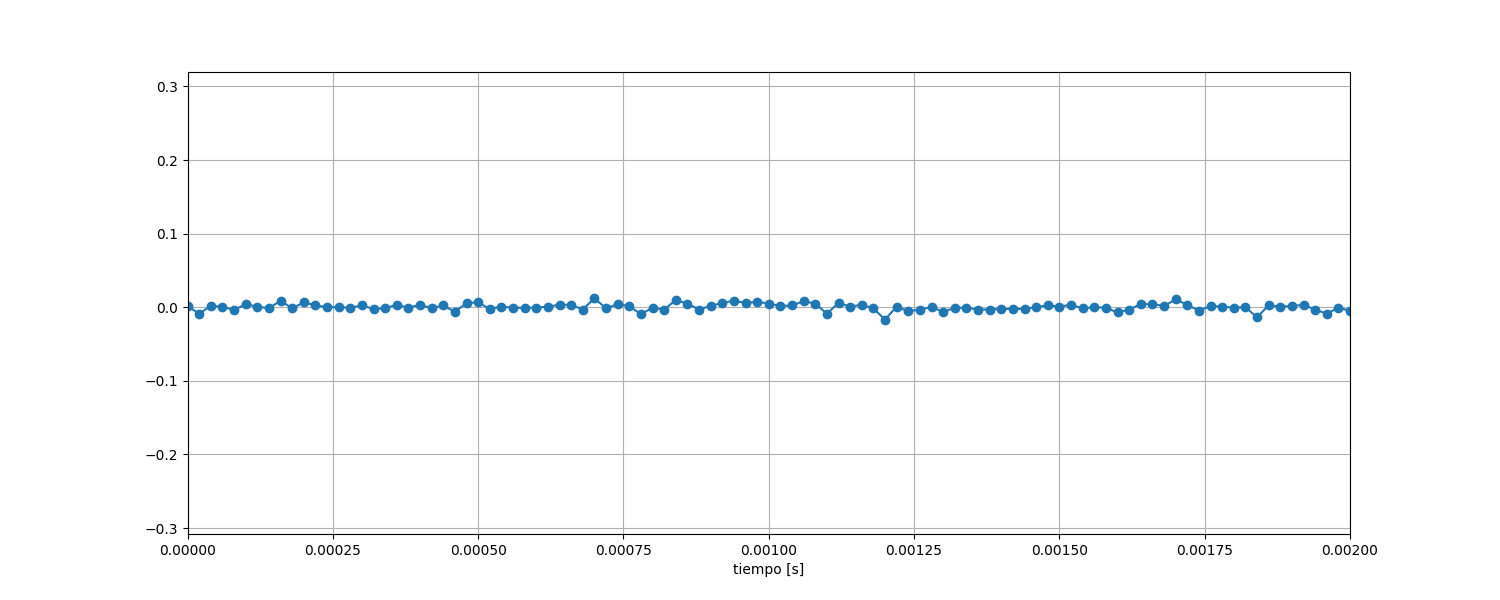

In [18]:
n = len(lecturas)
muestras_visualizar = n
eje_tiempo = np.linspace(0,muestras_visualizar/fs,muestras_visualizar) 
plt.figure(figsize=(15,6))
y_medio = señal.mean()
plt.plot(eje_tiempo,señal-y_medio,'-o')#-y_medio)
plt.xlabel('tiempo [s]')
plt.xlim(0,0.002)
plt.grid()

In [19]:
Audio(señal-y_medio, rate=fs)

In [14]:
dt = 1/fs
num_muestras = 4096
espectro, frec = FFT(señal[0:4096]-y_medio,dt)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


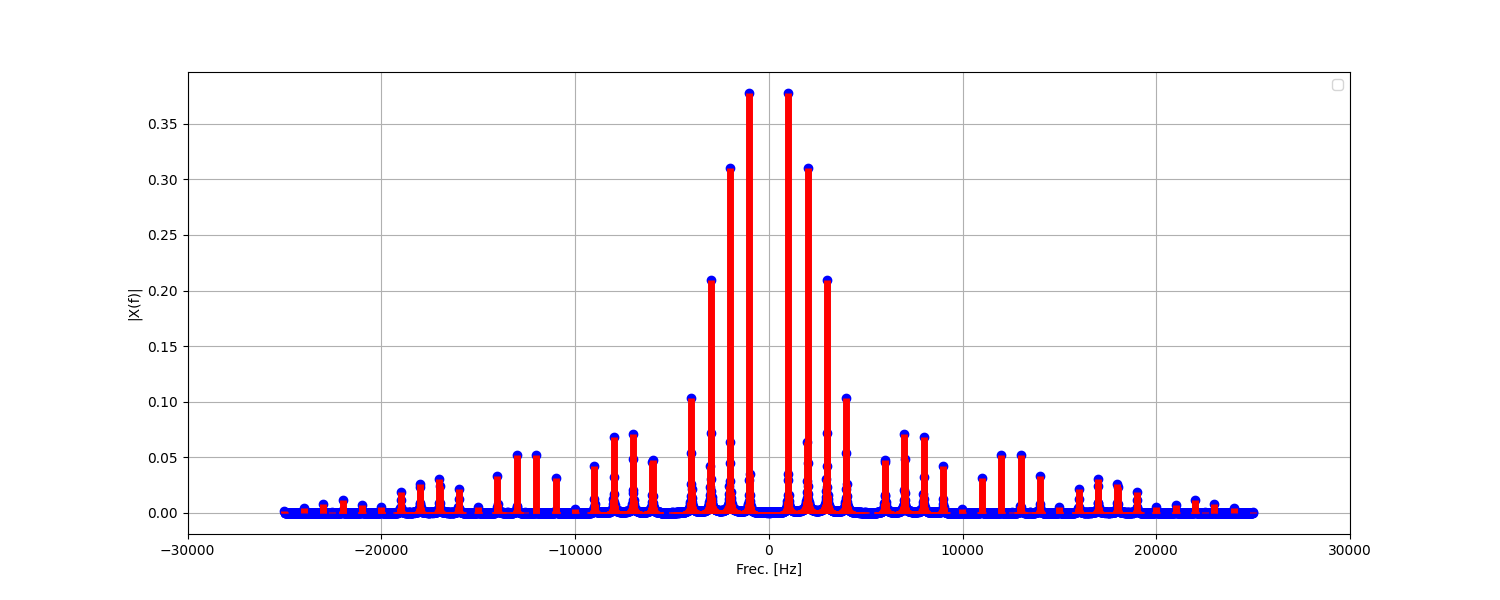

In [15]:
plt.figure(figsize=(15,6))
plt.plot(frec,np.abs(espectro),'ob',label = '')
plt.vlines(frec, 0, np.abs(espectro),'r',label = '',lw = 5)

plt.grid(),plt.xlim(-30e3,30e3)
plt.xlabel('Frec. [Hz]'),plt.ylabel('|X(f)|'),plt.legend()
plt.show()